In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
data = pd.read_csv("computer_prices_all.csv")

In [3]:
data.head()

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99


In [4]:
data.isnull().sum()

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null  object 
 15  gpu_tier          

In [6]:
data.columns

Index(['device_type', 'brand', 'model', 'release_year', 'os', 'form_factor',
       'cpu_brand', 'cpu_model', 'cpu_tier', 'cpu_cores', 'cpu_threads',
       'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_brand', 'gpu_model', 'gpu_tier',
       'vram_gb', 'ram_gb', 'storage_type', 'storage_gb',
       'storage_drive_count', 'display_type', 'display_size_in', 'resolution',
       'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'wifi',
       'bluetooth', 'weight_kg', 'warranty_months', 'price'],
      dtype='object')

In [85]:
Highest_Price_brand = data.groupby("brand")["price"].sum().reset_index().head(5)
Highest_Price_brand.columns = ["Brand", "Total_price"]
Highest_Price_brand

,Brand,Total_price
0,ASUS,18774931.41
1,Acer,17471493.75
2,Apple,28146754.85
3,Dell,26368886.95
4,Gigabyte,9144889.00


In [56]:
yearly_brand = data.groupby("release_year")["brand"].count().reset_index()
yearly_brand.columns = ["Release_year","Total_Used_brands"]
yearly_brand

,Release_year,Total_Used_brands
0,2018,5030
1,2019,7090
2,2020,7986
3,2021,12016
4,2022,16054
5,2023,18020
6,2024,17969
7,2025,15835


In [58]:
most_os_used = data.value_counts("os").sort_index(ascending=False).reset_index()
most_os_used.columns = ['OS','Total_OS']
most_os_used

,OS,Total_OS
0,macOS,18207
1,Windows,71817
2,Linux,6109
3,ChromeOS,3867


In [13]:
most_device_type = data.groupby("brand")["device_type"].count().reset_index().sort_values(by="brand",ascending=False)

In [14]:
most_device_type

,brand,device_type
9,Samsung,8066
8,Razer,3033
7,MSI,7891
6,Lenovo,15992
5,HP,14114
4,Gigabyte,4900
3,Dell,14005
2,Apple,11915
1,Acer,9925
0,ASUS,10159


In [15]:
average_brand_price = data.groupby("brand")["price"].mean().reset_index().round()

In [16]:
average_brand_price.columns = ["Brand","Total Average Price"]

In [17]:
average_brand_price

,Brand,Total Average Price
0,ASUS,1848.0
1,Acer,1760.0
2,Apple,2362.0
3,Dell,1883.0
4,Gigabyte,1866.0
5,HP,1857.0
6,Lenovo,1866.0
7,MSI,1906.0
8,Razer,2080.0
9,Samsung,1930.0


In [18]:
Average_OS_Price = data.groupby("os")["price"].mean().reset_index()

In [19]:
Average_OS_Price.columns = ["OS","Average Price"]

In [20]:
Average_OS_Price

,OS,Average Price
0,ChromeOS,1799.440737
1,Linux,1839.481079
2,Windows,1886.359105
3,macOS,2153.454327


In [21]:
Highest_Average_CPU_Price = data.groupby("cpu_tier")["price"].mean().sort_index(ascending=False).reset_index() 

In [22]:
Highest_Average_CPU_Price.columns = ["CPU_Tier","Average_Price"]

In [23]:
Highest_Average_CPU_Price

,CPU_Tier,Average_Price
0,6,2910.000398
1,5,2553.339245
2,4,2186.258720
3,3,1842.932878
4,2,1536.402802
5,1,1313.740289


In [24]:
Average_Price_Per_Year = data.groupby("release_year")["price"].mean().reset_index()

In [25]:
Average_Price_Per_Year.columns = ["Release_Year","Average_Price"]

In [26]:
Average_Price_Per_Year

,Release_Year,Average_Price
0,2018,1821.408489
1,2019,1845.103399
2,2020,1862.042342
3,2021,1892.761721
4,2022,1923.007566
5,2023,1944.054872
6,2024,1979.363977
7,2025,1992.310429


In [ ]:
OS_Brand_Combination = (
    data.groupby(["brand", "os"])
    .size()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
).head(3)


In [ ]:
OS_Brand_Combination

In [29]:
valueable_brand = (
    data.groupby("brand")["price"]
    .sum()
    .reset_index()
    .sort_values(by="price", ascending=False)
)

Text(0, 0.5, 'Brands')

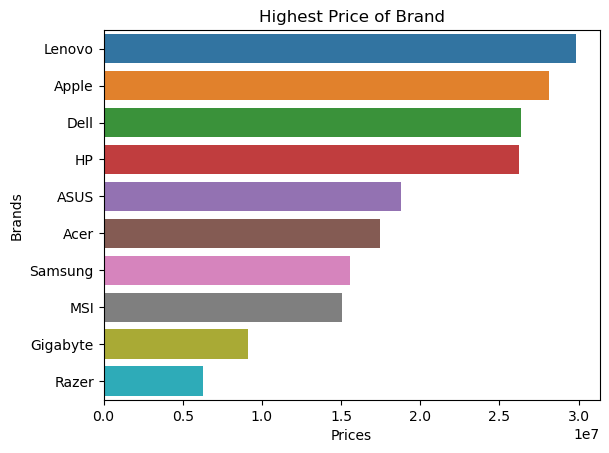

In [63]:
sns.barplot(x="price",y="brand",data=valueable_brand,hue="brand")
plt.title("Highest Price of Brand")
plt.xlabel("Prices")
plt.ylabel("Brands")

In [31]:
yearly_brand = data.groupby("release_year")["price"].sum().reset_index().sort_values(by="price",ascending=False)

Text(0, 0.5, 'Prices')

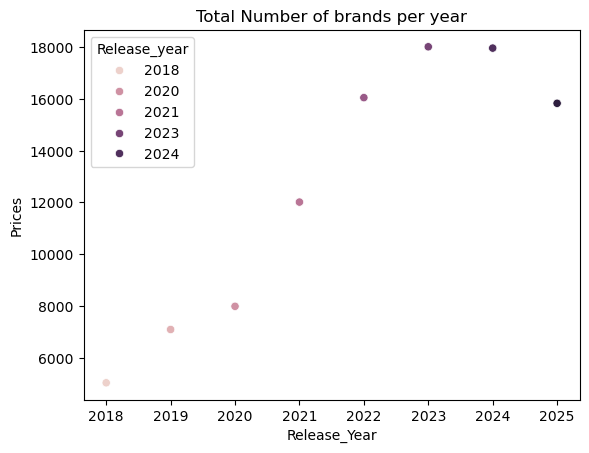

In [66]:
sns.scatterplot(x="Release_year",y="Total_Used_brands",data=yearly_brand,hue="Release_year")
plt.title("Total Number of brands per year")
plt.xlabel("Release_Year")
plt.ylabel("Prices")

In [33]:
most_os_used.columns = ["os",'count']

In [34]:
most_os_used

,os,count
0,macOS,18207
1,Windows,71817
2,Linux,6109
3,ChromeOS,3867


Text(0, 0.5, 'Counts')

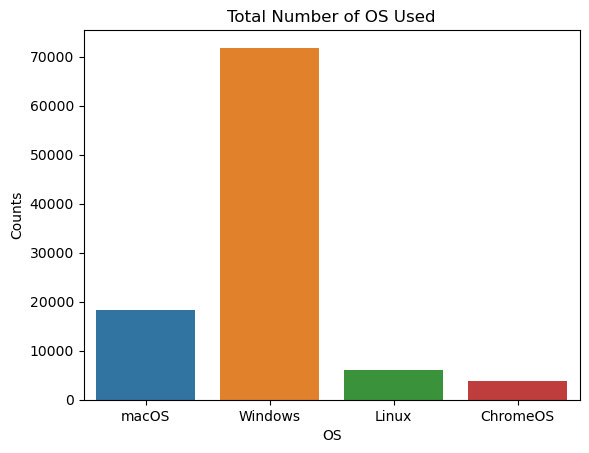

In [68]:
sns.barplot(x='OS',y='Total_OS',data=most_os_used,hue="OS")
plt.title("Total Number of OS Used")
plt.xlabel("OS")
plt.ylabel("Counts")

In [70]:
average_brand_price = data.groupby("brand", as_index=False)["price"].mean().round()
average_brand_price

,brand,price
0,ASUS,1848.0
1,Acer,1760.0
2,Apple,2362.0
3,Dell,1883.0
4,Gigabyte,1866.0
5,HP,1857.0
6,Lenovo,1866.0
7,MSI,1906.0
8,Razer,2080.0
9,Samsung,1930.0


Text(0, 0.5, 'Prices')

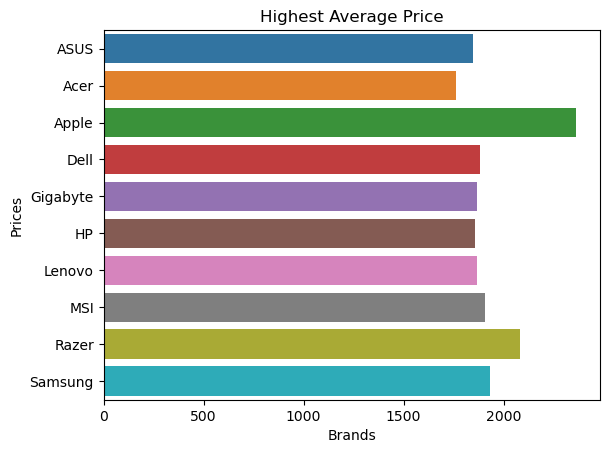

In [72]:
sns.barplot(x='price', y='brand', data=average_brand_price,hue='brand')
plt.title("Highest Average Price")
plt.xlabel("Brands")
plt.ylabel("Prices")

In [38]:
most_common_brand = data["brand"].value_counts(ascending=False).reset_index()

In [39]:
most_common_brand

,brand,count
0,Lenovo,15992
1,HP,14114
2,Dell,14005
3,Apple,11915
4,ASUS,10159
5,Acer,9925
6,Samsung,8066
7,MSI,7891
8,Gigabyte,4900
9,Razer,3033


Text(0, 0.5, 'Brands')

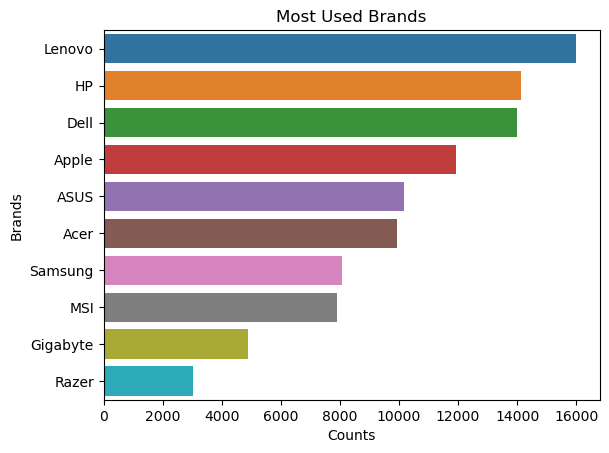

In [73]:
sns.barplot(x="count",y='brand',data=most_common_brand,hue="brand")
plt.title("Most Used Brands")
plt.xlabel("Counts")
plt.ylabel("Brands")

Text(0, 0.5, 'OS')

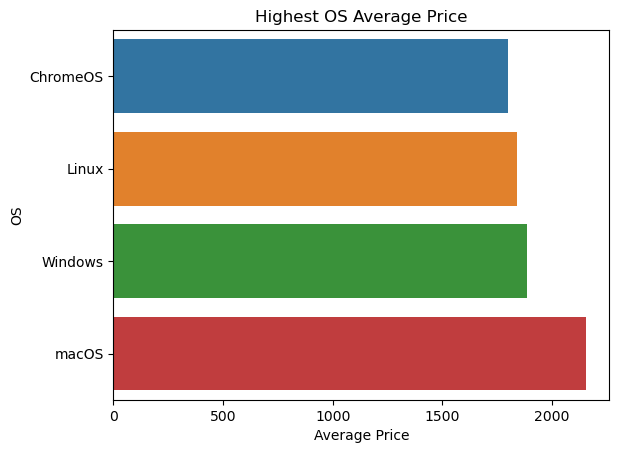

In [77]:
Average_OS_Price = data.groupby("os")["price"].mean().reset_index()
Average_OS_Price.columns = ["OS","Average Price"]
sns.barplot(x="Average Price",y="OS",data=Average_OS_Price,hue="OS")
plt.title("Highest OS Average Price")
plt.xlabel("Average Price")
plt.ylabel("OS")

In [42]:
Average_OS_Price

,OS,Average Price
0,ChromeOS,1799.440737
1,Linux,1839.481079
2,Windows,1886.359105
3,macOS,2153.454327


Text(0, 0.5, 'Average_Price')

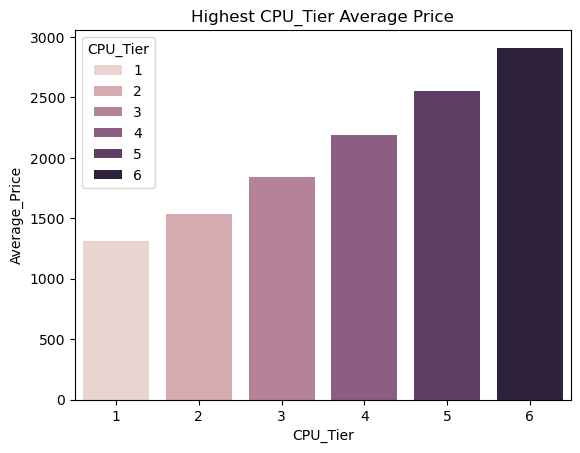

In [78]:
Highest_Average_CPU_Price = data.groupby("cpu_tier")["price"].mean().sort_index(ascending=False).reset_index() 
Highest_Average_CPU_Price.columns = ["CPU_Tier","Average_Price"]
sns.barplot(x="CPU_Tier",y="Average_Price",data=Highest_Average_CPU_Price,hue="CPU_Tier")
plt.title("Highest CPU_Tier Average Price")
plt.xlabel("CPU_Tier")
plt.ylabel("Average_Price")

Text(0, 0.5, 'Release_Year')

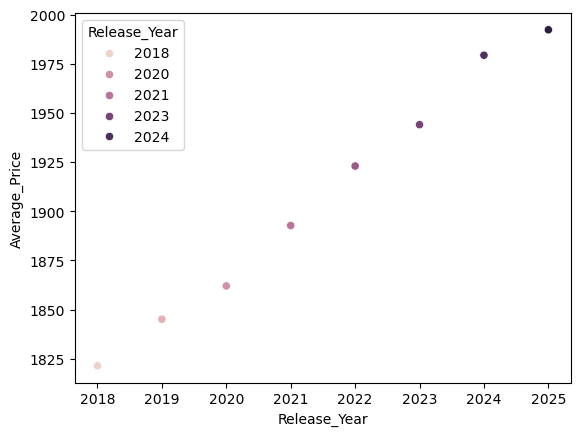

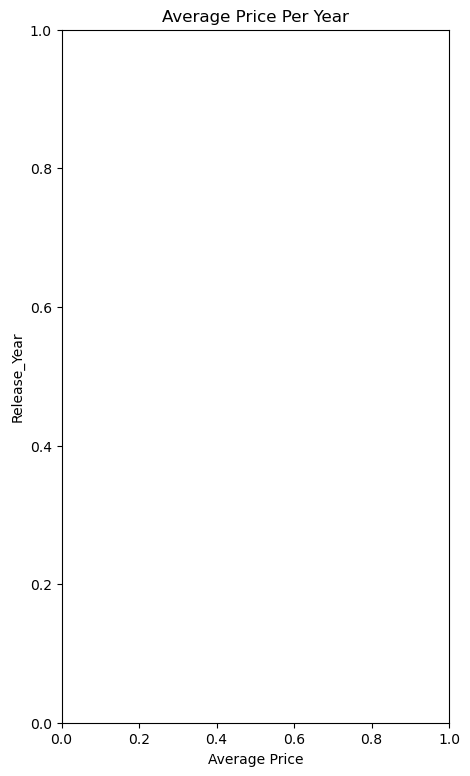

In [80]:
Average_Price_Per_Year = data.groupby("release_year")["price"].mean().reset_index()
Average_Price_Per_Year.columns = ["Release_Year","Average_Price"] 
sns.scatterplot(x="Release_Year",y="Average_Price",data=Average_Price_Per_Year,hue="Release_Year")
plt.figure(figsize=(5,9))
plt.title("Average Price Per Year")
plt.xlabel("Average Price")
plt.ylabel("Release_Year")

In [82]:
OS_Brand_Combination = (
    data.groupby(["brand", "os"])
    .size()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)
sns.barplot(x="Count", y="brand", hue="os", data=OS_Brand_Combination,hue=brand)
plt.title("Total Brands")
plt.xlabel("Brands")
plt.ylabel("Counts")


SyntaxError: keyword argument repeated: hue (1930431033.py, line 7)

In [46]:
data.columns

Index(['device_type', 'brand', 'model', 'release_year', 'os', 'form_factor',
       'cpu_brand', 'cpu_model', 'cpu_tier', 'cpu_cores', 'cpu_threads',
       'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_brand', 'gpu_model', 'gpu_tier',
       'vram_gb', 'ram_gb', 'storage_type', 'storage_gb',
       'storage_drive_count', 'display_type', 'display_size_in', 'resolution',
       'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'wifi',
       'bluetooth', 'weight_kg', 'warranty_months', 'price'],
      dtype='object')